<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    FIT-HCMUS, VNU-HCM 
    <br>
    Introduction To Data Science 
    <br>
    Final project 📌
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 03 - Data exploration 📌
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/processed/processed_fb_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4934 entries, 0 to 4933
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           4934 non-null   object 
 1   Position       4934 non-null   object 
 2   PreferredFoot  4934 non-null   object 
 3   Season         4934 non-null   object 
 4   Age            4934 non-null   int64  
 5   Squad          4934 non-null   object 
 6   Country        4934 non-null   object 
 7   Comp           4934 non-null   object 
 8   LgRank         4934 non-null   int64  
 9   MP             4934 non-null   int64  
 10  Starts         4934 non-null   int64  
 11  Min            4934 non-null   int64  
 12  90s            4934 non-null   float64
 13  Gls            4934 non-null   int64  
 14  Ast            4934 non-null   int64  
 15  G+A            4934 non-null   int64  
 16  G-PK           4934 non-null   int64  
 17  PK             4934 non-null   int64  
 18  PKatt   

# Basic level

## What is the distribution of the data in each column?

## Categorial data

### Analyzing Positon

In [3]:
position = df[['Name', 'Position']].drop_duplicates()
position.describe()

,Name,Position
count,430,430
unique,430,4
top,William Saliba,DF
freq,1,172


- It can be observed that the dataset comprises 430 players.
- Furthermore, throughout various seasons, the positions of players on the field remain consistent.

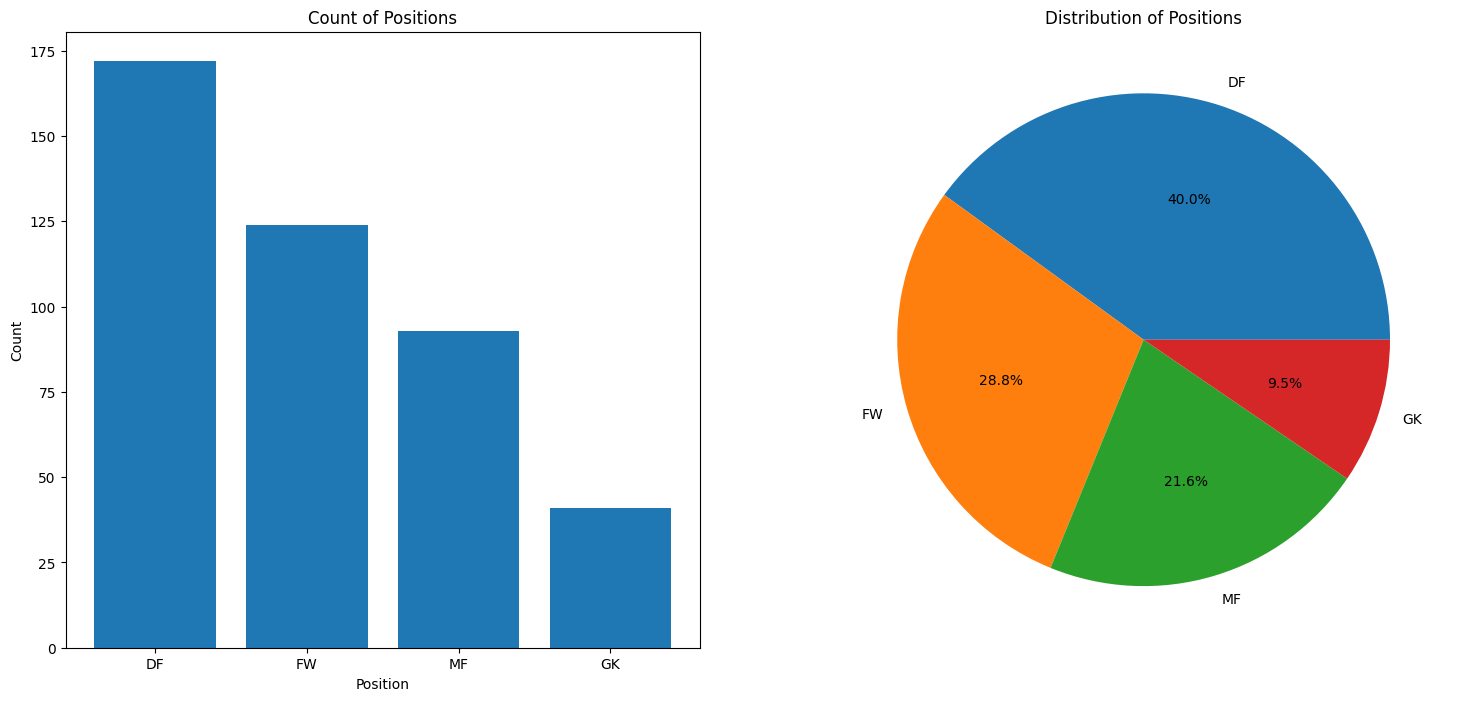

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
position_count = position['Position'].value_counts()
axes[0].bar(position_count.index, position_count.values)
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Count')
axes[0].set_title('Count of Positions')

axes[1].pie(position_count.values, labels = position_count.index, autopct='%1.1f%%', startangle=0)
axes[1].set_title('Distribution of Positions')
plt.show()

- It can be noted that:
    - Among the 430 players, they are distributed across positions such as DF (Defender), FW (Forward), MF (Midfielder), and GK (Goalkeeper).
    - Specifically, the most prevalent position is DF (40%), followed by FW (28.8%) and MF (21.6%), with GK holding the lowest proportion (9.5%).

### Analyzing PreferredFoot

In [5]:
preferred_foot = df[['Name', 'PreferredFoot']].drop_duplicates()
preferred_foot.describe()

,Name,PreferredFoot
count,430,430
unique,430,3
top,William Saliba,Right
freq,1,314


- It can be observed that, throughout various seasons, the preferred kicking foot of players on the field also remains unchanged.

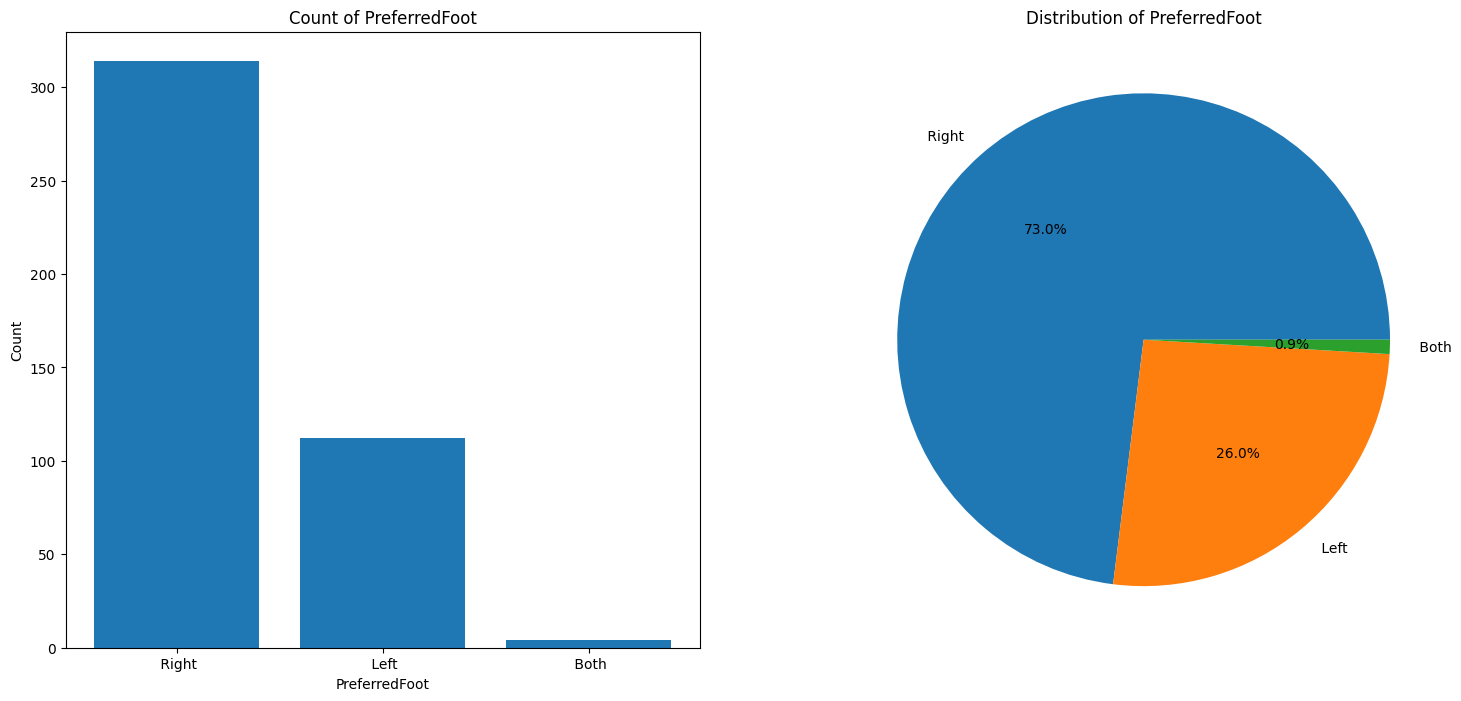

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
preferred_foot_count = preferred_foot['PreferredFoot'].value_counts()
axes[0].bar(preferred_foot_count.index, preferred_foot_count.values)
axes[0].set_xlabel('PreferredFoot')
axes[0].set_ylabel('Count')
axes[0].set_title('Count of PreferredFoot')

axes[1].pie(preferred_foot_count.values, labels = preferred_foot_count.index, autopct='%1.1f%%', startangle=0)
axes[1].set_title('Distribution of PreferredFoot')
plt.show()

- The majority of players exhibit a right-footed preference, accounting for 73%. Left-footed players constitute a lower proportion at 26%. Players who are proficient with both feet represent a minimal percentage at 0.9%.

### Analyzing Season

In [7]:
df['Season'].describe()

count          4934
unique           10
top       2020-2021
freq            769
Name: Season, dtype: object

- It is evident that our data spans across 10 different seasons.

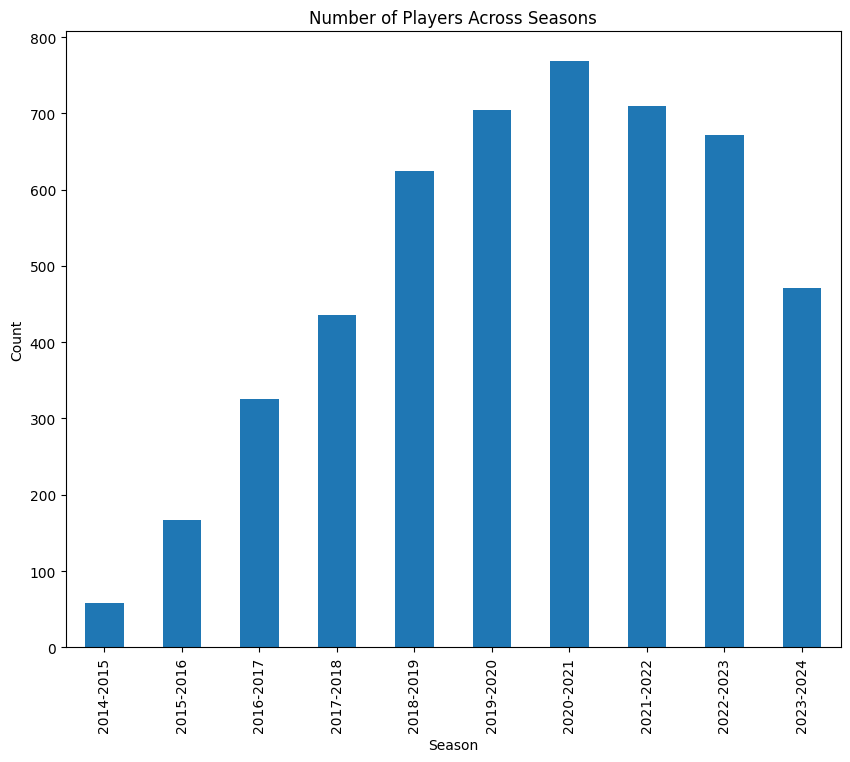

In [64]:
plt.figure(figsize=(10,8))
df['Season'].value_counts().sort_index().plot(kind='bar')
plt.ylabel('Count')
plt.title('Number of Players Across Seasons')
plt.show()

- The figures regarding the number of participating players exhibit variations across each season.
- The highest player participation is observed in the 2020-2021 season, with 769 players, while the lowest is in the 2014-2015 season, with 58 players.
- The data on player participation shows an increasing trend from 2014 to 2020, followed by a declining trend from 2021 to 2024.

### Analyzing Squad

In [34]:
squad_df =  df['Squad']
squad_df.describe()

count        4934
unique        341
top       Arsenal
freq          192
Name: Squad, dtype: object

- There are a total of 341 different football teams in the dataset.
- Furthermore, it can be observed that a player may participate in different teams across different seasons.

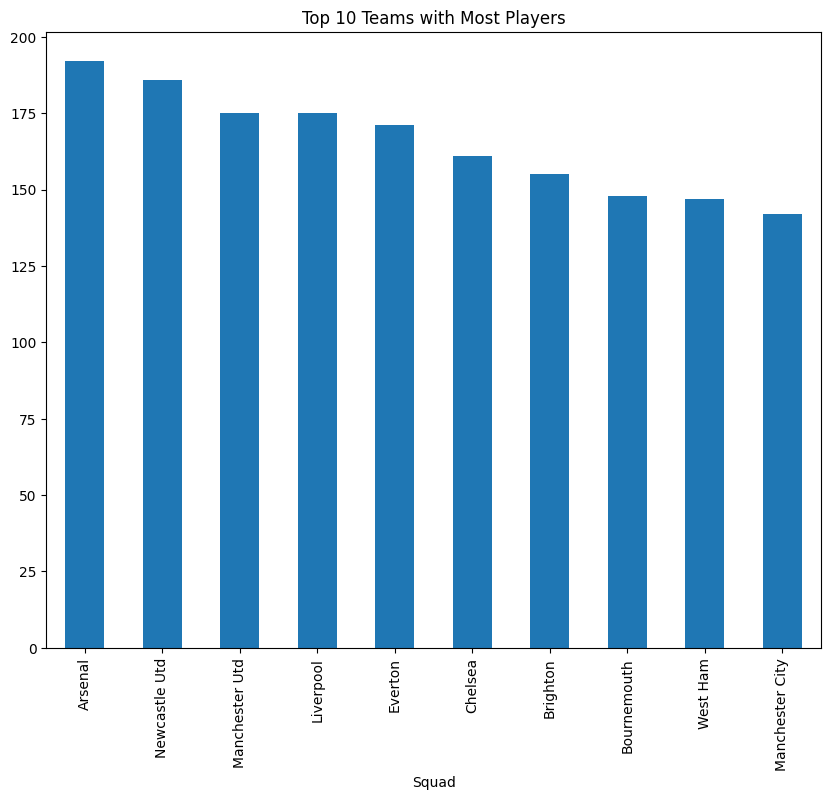

In [65]:
plt.figure(figsize=(10,8))
squad_df.value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Teams with Most Players')
plt.show()

In [60]:
print(f'The top 10 teams collectively represent {round((squad_df.value_counts()[:10].sum()/squad_df.value_counts().sum())*100,2)}% sof the total number of players.')

The top 10 teams collectively represent 33.48% sof the total number of players.


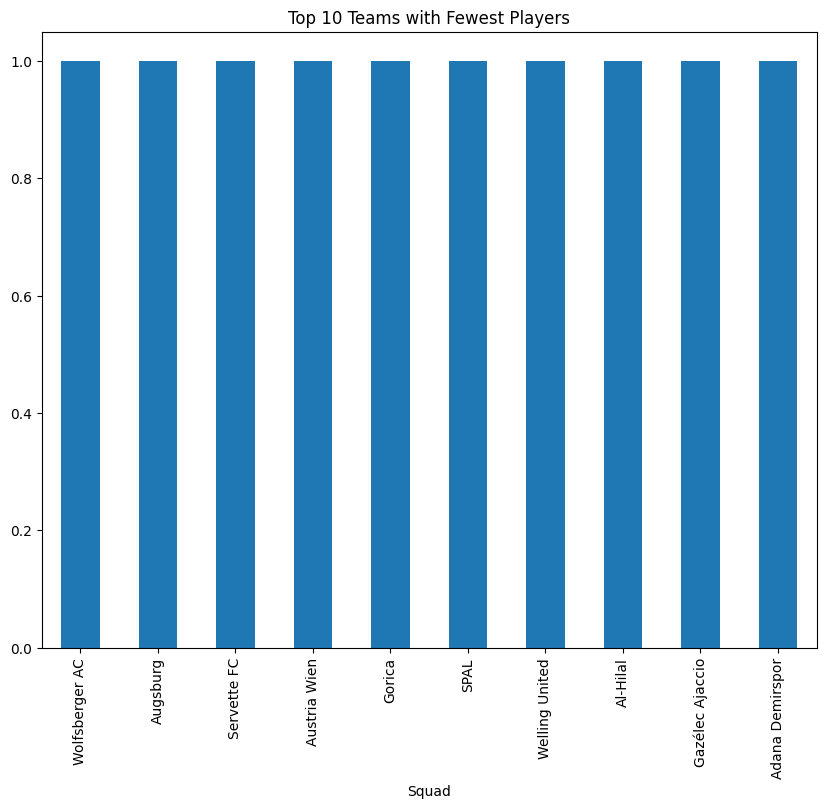

In [66]:
plt.figure(figsize=(10,8))
squad_df.value_counts()[-10:].plot(kind='bar')
plt.title('Top 10 Teams with Fewest Players')
plt.show()

In [46]:
squad_df.value_counts().describe()

count    341.000000
mean      14.469208
std       33.107620
min        1.000000
25%        1.000000
50%        3.000000
75%        9.000000
max      192.000000
Name: count, dtype: float64

- The team with the highest number of participating players over the 10 main seasons is Arsenal.
- The top 10 teams with the most players account for 33.48% of the total number of participating players.
- 25% of the teams have only one player participating across the 10 seasons.

### Analyzing Country

In [11]:
df['Country'].describe()

count     4934
unique      33
top        ENG
freq      3339
Name: Country, dtype: object

- There are players from 33 different countries participating in the matches.

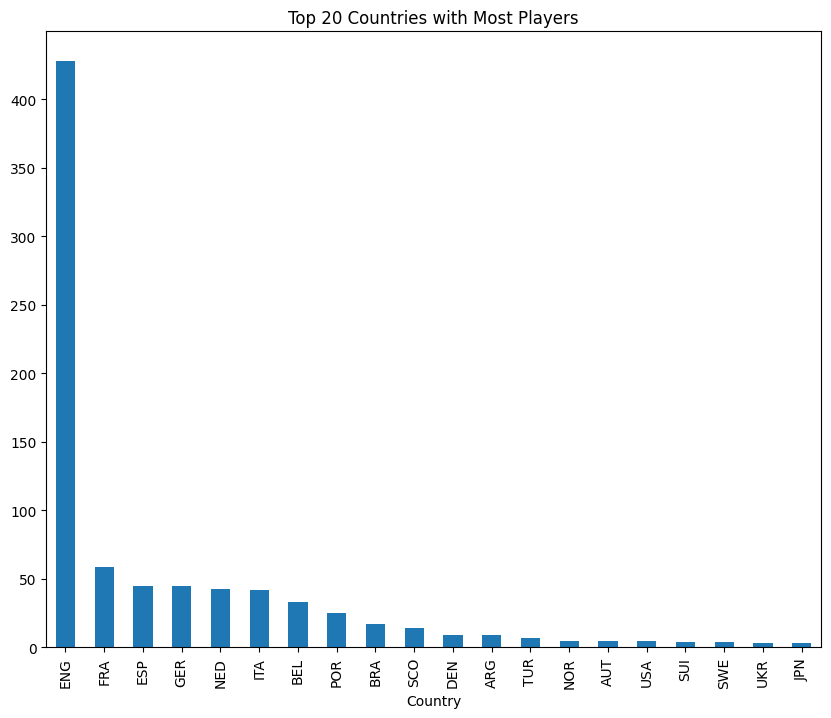

In [67]:
plt.figure(figsize=(10,8))
df[['Name', 'Country']].drop_duplicates()['Country'].value_counts()[:20].plot(kind='bar')
plt.title('Top 20 Countries with Most Players')
plt.show()

In [54]:
df[['Name', 'Country']].drop_duplicates()['Country'].value_counts().describe()

count     33.000000
mean      25.090909
std       74.190786
min        1.000000
25%        2.000000
50%        4.000000
75%       17.000000
max      428.000000
Name: count, dtype: float64

- It is evident that ENG (England) has the highest number of participating players, exceeding the second-ranked country, FRA (France), by more than 7 times.
- 75% of the countries have fewer than 17 players participating in the matches.

### Analyzing Comp

In [13]:
df['Comp'].describe()

count               4934
unique                50
top       Premier League
freq                2317
Name: Comp, dtype: object

- There are statistics for 50 different football leagues in the dataset.

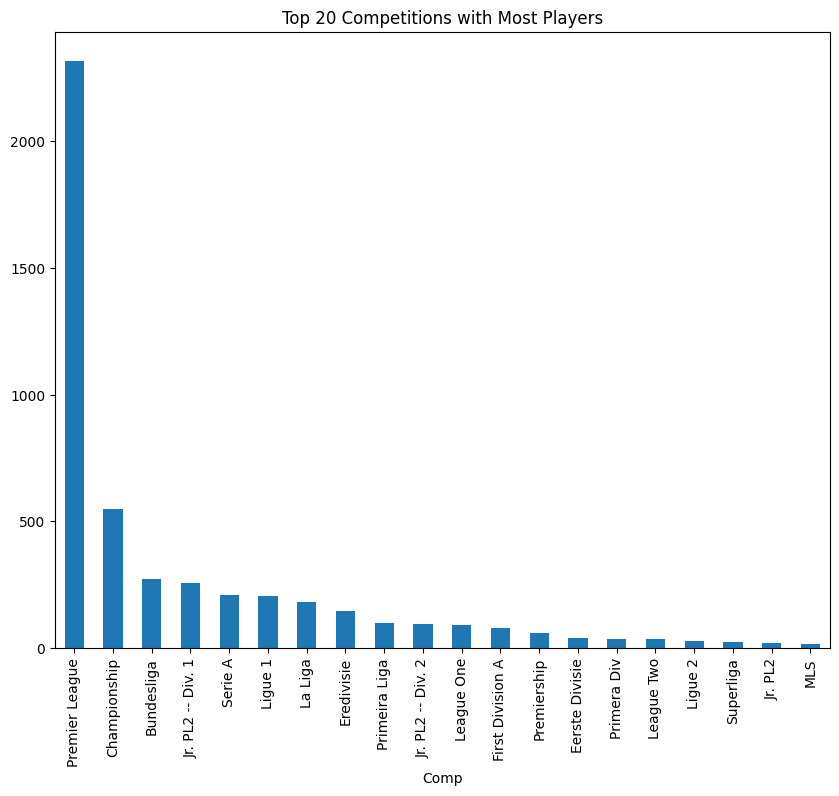

In [68]:
plt.figure(figsize=(10,8))
df['Comp'].value_counts()[:20].plot(kind='bar')
plt.title('Top 20 Competitions with Most Players')
plt.show()

In [55]:
df['Comp'].value_counts().describe()

count      50.000000
mean       98.680000
std       335.125346
min         1.000000
25%         4.000000
50%        13.000000
75%        54.250000
max      2317.000000
Name: count, dtype: float64

- It is evident that the Premier League has the highest number of participating players, with 2317 players (nearly 50% of the total number of participating players).
- All leagues have at least one player participating in the matches.
- 75% of the leagues have fewer than 54 players participating.

### Analyzing Injury

In [15]:
injury_df =  df[df['Injury'].notna()]['Injury']
injury_df.describe()

count                 2724
unique                 183
top       Hamstring injury
freq                   311
Name: Injury, dtype: object

- There are records for 183 different types of injuries suffered by players.

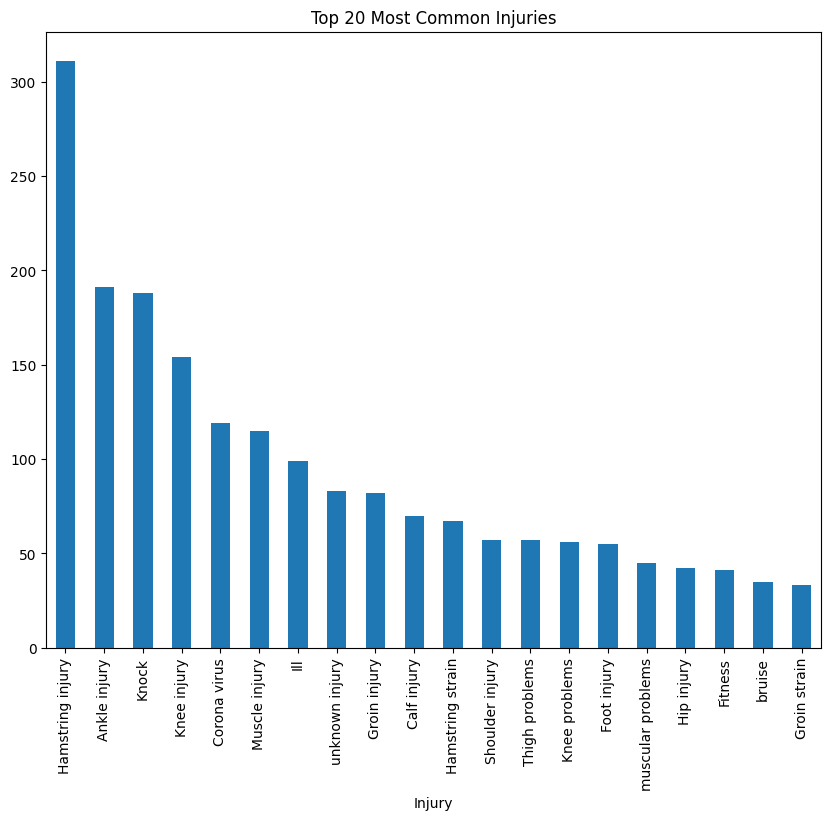

In [69]:
plt.figure(figsize=(10,8))
injury_df.value_counts()[:20].plot(kind='bar')
plt.title('Top 20 Most Common Injuries')
plt.show()

In [63]:
round((injury_df.value_counts()[:20].sum()/injury_df.value_counts().sum())*100,0)

70.0

In [56]:
injury_df.value_counts().describe()

count    183.000000
mean      14.885246
std       36.498125
min        1.000000
25%        1.000000
50%        3.000000
75%        9.500000
max      311.000000
Name: count, dtype: float64

- The most frequently occurring injury type is "Hamstring injury," appearing 311 times.
- The top 20 injuries, in terms of frequency, constitute nearly 70% of the total number of player injuries.
- The majority of injuries (75% of injury types) have fewer than 7 occurrences.

## Numerical data

# Making qeustion

## Question 1

**A possible question is:** How does overall player performance vary across different seasons?

**Answering this question will** help us to understand if there are seasonal trends in the performance of football players.

**How we answer this question**: Aggregate and analyze performance metrics (e.g., goals, assists) by season.

## Question 2

**A possible question is:** Are players more prone to injuries as they age?

**Answering this question will** explore if there's a relationship between a player's age and the likelihood of sustaining injuries.

**How we answer this question:** Analyze the frequency and types of injuries across different age groups.

## Question 3

**A possible question is:** How does the average duration of rest vary across different types of injuries?

**Answering this question will** help us understand the typical recovery time associated with each type of injury.

**How we answer this question:** Calculate the average duration of rest for each reported injury type.

## Question 4

**A possible question is:** How does the distribution of football players vary among countries in the dataset?

**Answering this question will** help us understand the spread of player representation across different countries.

**How we answer this question:** Examine the distribution of players among various countries.

## Question 5

**A possible question is:** What is the distribution of players across different positions in the dataset?

**Answering this question will** help us understand how players are spread across various playing positions.

**How we answer this question:** Create a breakdown of the number of players for each position.

## Question 6

**A possible question is:** What is the distribution of goals scored by players across different positions in the dataset?

**Answering this question will** help us understand how goals are spread across various playing positions.

**How we answer this question:** Create a breakdown of the number of goals scored by players for each position.

## Question 7

**A possible question is:** How does the number of injuries vary across player positions?

**Answering this question will** help us understand if there are differences in the injury rates based on player positions.

**How we answer this question:** Analyze and aggregate the number of injuries for each playing position.

## Question 8

**A possible question is:** How many times have the top 10 players with the most minutes played experienced injuries?

**Answering this question will** Understand the overall injury frequency for the highest-minutes players.

**How we answer this question:** Collect and calculate average the injury occurrences for each player in the top 10.